<a href="https://colab.research.google.com/github/jayshivankar/KNN-Model/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data set - https://drive.google.com/file/d/1WSHQE4vw3qsteuaY0a05M0yAbYtbV7Py/view?usp=drive_link

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, roc_auc_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/Iris.csv')

# data sample
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# data dimension
data.shape

(150, 6)

In [ ]:
# missing value
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# data type check
data.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
# data duplicates
data[data.duplicated()].shape

(0, 6)

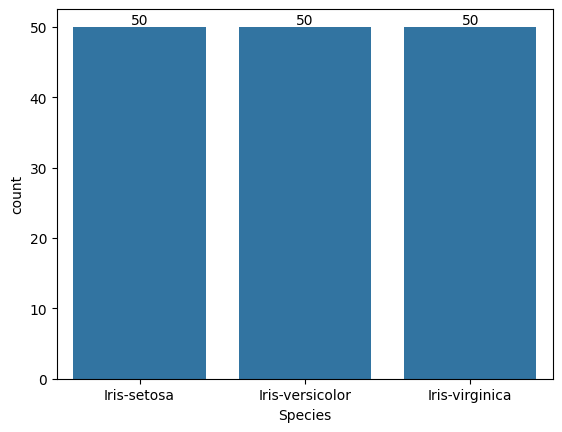

In [ ]:
# understand the target column
round(data['Species'].value_counts(normalize=True)*100, 2)

# visualize
ax = sns.countplot(x=data['Species'])
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# label encoding the target variable
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

# data after encoding
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
# dependent and independent split
x = data.iloc[:, 1:-1]
y = data['Species']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# dimension of train-test split
print('Training data dimension:', x_train.shape, y_train.shape)
print('Testing data dimension:', x_test.shape, y_test.shape)

Training data dimension: (120, 4) (120,)
Testing data dimension: (30, 4) (30,)


In [ ]:
y_test.value_counts()

,count
Species,
0,10
2,10
1,10


In [ ]:
# data scaling
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)

# test scaling
x_test_scaled = scale.transform(x_test)

In [ ]:
# KNN Algo

error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    error.append(np.mean(y_pred != y_test))

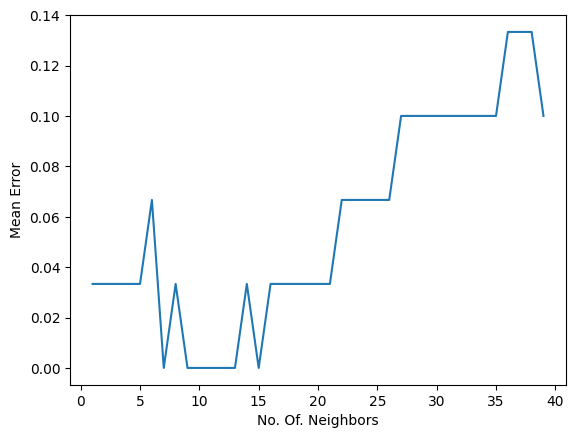

In [ ]:
# errors vs neighbors
plt.plot(range(1, 40), error)
plt.xlabel('No. Of. Neighbors')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
# Using cross validator to find the optimum number of neighbors
k_value = range(1, 22)
cv_score = []

for k in k_value:
    knn_cv = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    scores = cross_val_score(knn_cv, x_train_scaled, y_train, scoring='accuracy', n_jobs=-1)
    cv_score.append(scores.mean())

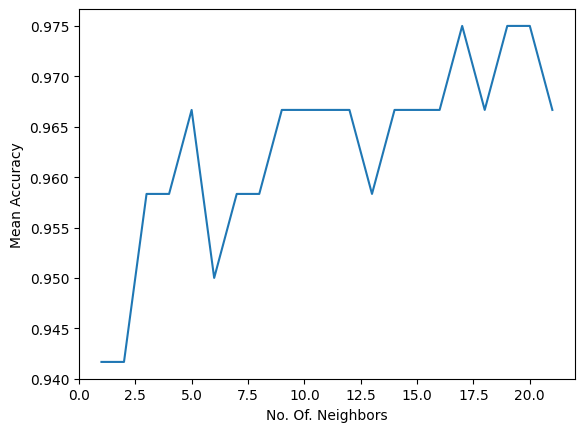

In [ ]:
# accuracy vs neighbors
plt.plot(k_value, cv_score)
plt.xlabel('No. Of. Neighbors')
plt.ylabel('Mean Accuracy')
plt.show()

In [ ]:
# Model with optimum neighbor
model = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)
model.fit(x_train_scaled, y_train)
print('Training Score:', round(model.score(x_train_scaled, y_train)*100, 2), '%')

Training Score: 100.0 %


In [ ]:
# predictions
y_pred = model.predict(x_test_scaled)

# metrics
print('Testing Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')

Testing Score: 100.0 %


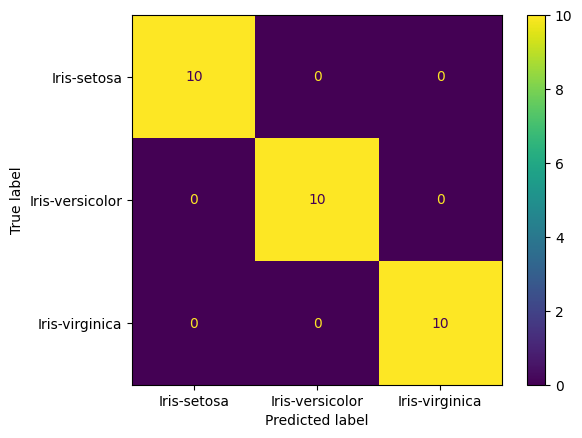

In [ ]:
# confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=list(encoder.inverse_transform([0, 1, 2])))